This notebook succeeds reviews_characters_1.ipynb and aims to answer the subquestion: Is there a correlation between multiple variables of book reviews, such as ratings, the review length, the book review support, and so on?

In this section, we only show a summary of the results. For detailed conclusions and discussions, please refer to the results section of the paper.

## **1.Data Merging and Analysis**

Before correlating the seven variables, we need to merge the data and see the distribution of the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import required libraries
import pandas as pd
import os

In [ ]:
# Define the path to the directory containing CSV files to be merged
directory_path = "/content/drive/MyDrive/page_5_reviews_positive_prob"

# Create an empty DataFrame to store merged data
merged_df = pd.DataFrame()

# Loop through each file in the specified directory
for filename in os.listdir(directory_path):
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Concatenate the new DataFrame with the existing merged DataFrame
        # This adds the data from the new CSV to the overall dataset
        merged_df = pd.concat([merged_df, df], ignore_index=True)

# Define the output path for the merged CSV file
output_path = "/content/drive/MyDrive/merged_data/page_5_reviews.csv"
# Save the merged DataFrame to a CSV file at the specified output path
# index=False ensures that row indices are not written to the CSV file
merged_df.to_csv(output_path, index=False)
# Print a confirmation message with the path where the merged CSV has been saved
print(f"CSV files have been merged and saved to: {output_path}")

CSV files have been merged and saved to: /content/drive/MyDrive/merged_data/page_5_reviews.csv


In [ ]:
# Define the path to the directory containing the merged CSV files
folder_path = '/content/drive/MyDrive/merged_data'

# Create a list of all CSV files in the specified directory
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read each CSV file into a list of DataFrames
data_frames = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# Concatenate all DataFrames in the list into a single DataFrame
# This combines data from all CSV files into one DataFrame
merged_data = pd.concat(data_frames, ignore_index=True)
# Display the first few rows of the merged DataFrame to verify the data
merged_data.head()


,Reviewer,Review Count,Followers,Rating,Date,Likes,Content,Language,cleaned_reviews,Number_of_Days,word_count,label,score,positive_prob
0,Margaret M - (on holiday even more catching up...,530.0,1452.0,4.0,24-Apr-23,345.0,And its finally here... The prequel to 'The Pr...,en,finally prequel priory orange tree rich conten...,400,321,neutral,0.853271,0.145260
1,EmmaSkies,202.0,5130.0,4.0,27-Feb-23,264.0,"Almost 3 months ago I said I would come back ""...",en,almost month ago said would come back tomorrow...,456,271,neutral,0.998620,0.000915
2,Sam,562.0,106.0,5.0,10-May-23,175.0,"Samantha Shannon has done it again, with an ep...",en,samantha shannon ha done epic fantasy truly de...,384,62,positive,0.971688,0.971688
3,maggie (taylor’s version),80.0,9.0,5.0,17-Jan-24,133.0,let’s see how long it takes me to read this on...,en,let see long take read one aha,132,7,neutral,0.999100,0.000695
4,Arundhati,50.0,219.0,5.0,15-Sep-22,128.0,"This sweeping, breathtaking prequel to the Pri...",en,sweeping breathtaking prequel priory orange tr...,621,273,positive,0.997555,0.997555


array([[<Axes: title={'center': 'Review Count'}>,
        <Axes: title={'center': 'Followers'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Likes'}>,
        <Axes: title={'center': 'Number_of_Days'}>,
        <Axes: title={'center': 'word_count'}>],
       [<Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'positive_prob'}>, <Axes: >]],
      dtype=object)

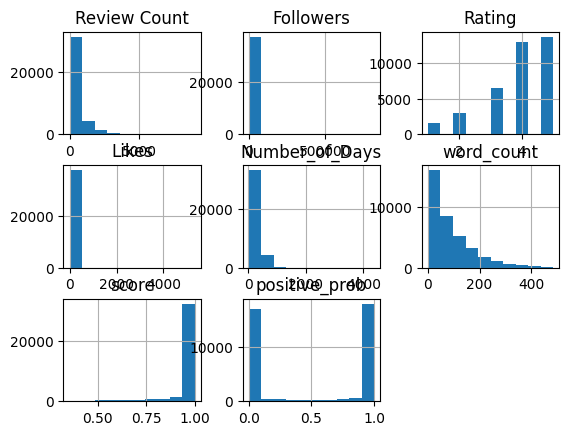

In [ ]:
# Generate and display histograms for each numerical column in the DataFrame
# This helps visualize the distribution of values in the dataset
merged_data.hist()

In [ ]:
# Generate and display descriptive statistics for each numerical column
# This provides summary statistics such as mean, median, and standard deviation
merged_data.describe()

,Review Count,Followers,Rating,Likes,Number_of_Days,word_count,score,positive_prob
count,37766.000000,37766.000000,37766.000000,37766.000000,37766.000000,37766.00000,37766.000000,37766.000000
mean,556.868294,2431.147408,3.914023,13.239051,295.766695,89.59723,0.961977,0.514501
std,782.330800,30258.513574,1.098388,70.065174,186.039074,86.01417,0.095184,0.480281
min,1.000000,1.000000,1.000000,1.000000,27.000000,1.00000,0.357080,0.000150
25%,122.000000,5.000000,3.000000,1.000000,174.000000,25.00000,0.986685,0.000723
50%,300.000000,24.000000,4.000000,3.000000,291.000000,63.00000,0.997941,0.713812
75%,655.000000,105.000000,5.000000,8.000000,399.000000,128.00000,0.999001,0.998534
max,9013.000000,818000.000000,5.000000,5343.000000,4368.000000,484.00000,0.999670,0.999670


## **2.Correlation**

In [ ]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib
import pylab
import pingouin as pg
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML

                Review Count  Followers    Rating     Likes  Number_of_Days  \
Review Count        1.000000   0.124530  0.000679  0.031684        0.034248   
Followers           0.124530   1.000000 -0.000424  0.285860        0.002462   
Rating              0.000679  -0.000424  1.000000 -0.025066       -0.011916   
Likes               0.031684   0.285860 -0.025066  1.000000        0.014989   
Number_of_Days      0.034248   0.002462 -0.011916  0.014989        1.000000   
word_count          0.072638   0.030365 -0.011668  0.080349        0.068042   
positive_prob      -0.017073  -0.005183  0.416033 -0.020644       -0.018470   

                word_count  positive_prob  
Review Count      0.072638      -0.017073  
Followers         0.030365      -0.005183  
Rating           -0.011668       0.416033  
Likes             0.080349      -0.020644  
Number_of_Days    0.068042      -0.018470  
word_count        1.000000      -0.067252  
positive_prob    -0.067252       1.000000  


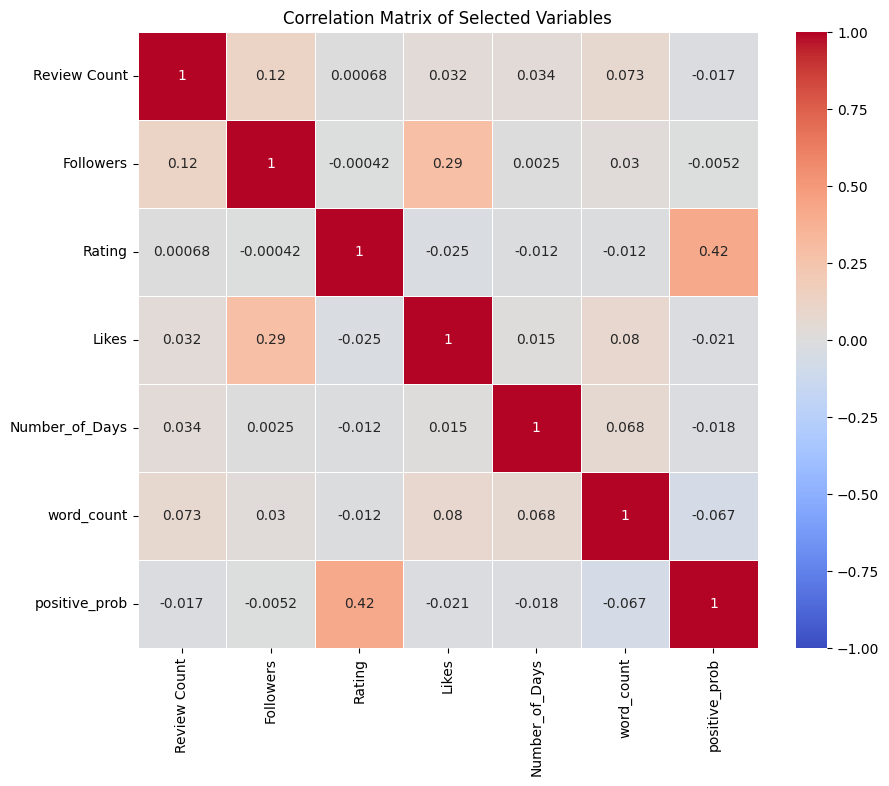

In [ ]:
# Define a list of columns to be selected from the merged data
# These columns are likely chosen for their relevance to the analysis
selected_columns = ['Review Count', 'Followers', 'Rating', 'Likes', 'Number_of_Days', 'word_count', 'positive_prob']
selected_data = merged_data[selected_columns]

# Create a new DataFrame that includes only the selected columns
# This helps focus the analysis on specific variables of interest
correlation_matrix = selected_data.corr()

# Calculate the correlation matrix for the selected columns
# The correlation matrix shows the relationship between each pair of variables
print(correlation_matrix)

# Print the correlation matrix to the console
# This provides a numerical overview of the relationships between the variables
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix using seaborn
# annot=True displays the correlation coefficients on the heatmap
# cmap='coolwarm' provides a color gradient from cool to warm colors to represent correlation strength
# vmin=-1 and vmax=1 set the range of correlation values displayed
# linewidths=0.5 adds lines between the cells for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Set the title for the heatmap
# This helps identify the purpose of the heatmap
plt.title('Correlation Matrix of Selected Variables')

# Display the heatmap
# This renders the heatmap visualization so you can visually analyze the correlations
plt.show()

## **3. Calculating Spearman coefficient**

If the Pearson correlation coefficient is not significant, it may indicate that there is no linear relationship. At this point, the Spearman correlation coefficient can be used to check for a non-linear monotonic relationship. The Spearman method is used because it measures the strength and direction of the monotonic relationship between the two variables (Melanie, 2024). If the Spearman correlation coefficient is greater than the Pearson correlation coefficient, it means there is a monotonic relationship rather than a simple linear relationship, and this relationship may be affected by other factors as well.

In [ ]:
# Extract the 'Rating' column from the merged DataFrame into a variable
# This isolates the data for ratings to analyze its relationship with positive probability
rating_count = merged_data['Rating']

# Extract the 'positive_prob' column from the merged DataFrame into a variable
# This isolates the data for positive probability to analyze its relationship with ratings
positive_prob_count = merged_data['positive_prob']

In [ ]:
# Calculate the Spearman rank correlation coefficient between the 'Rating' and 'positive_prob' columns
# Spearman correlation measures the strength and direction of association between two ranked variables
# This helps to understand if there's a monotonic relationship between the rating and positive probability
corr_SF = pg.corr(rating_count, positive_prob_count, method='spearman')

# Print the Spearman correlation coefficient to the console
# This provides a numerical measure of the correlation between ratings and positive probability
print(corr_SF)

              n         r         CI95%  p-val  power
spearman  37766  0.460853  [0.45, 0.47]    0.0    1.0


In [ ]:
# Extracting the 'Followers' column from the merged_data DataFrame and assigning it to the variable follower_count.
# This step isolates the follower count data, which we will use to calculate the correlation.
follower_count = merged_data['Followers']

# Extracting the 'Likes' column from the merged_data DataFrame and assigning it to the variable like_count.
# This step isolates the like count data, which will be used along with the follower count to analyze the relationship between them.
like_count = merged_data['Likes']

In [ ]:
# Calculating the Spearman correlation between follower_count and like_count using the pingouin (pg) library.
# The 'spearman' method is used because it measures the strength and direction of the monotonic relationship (rank correlation) between the two variables.
corr_SF = pg.corr(follower_count, like_count, method='spearman')

# Printing the Spearman correlation result.
# This step outputs the correlation value, which helps us understand the degree to which the follower count and like count are related in a monotonic way.
print(corr_SF)

              n         r        CI95%  p-val  power
spearman  37766  0.497343  [0.49, 0.5]    0.0    1.0


In [ ]:
# Extract the 'Review Count' column from the merged_data DataFrame and assign it to the variable 'review_count'
# This step isolates the data related to the number of reviews, which will be used to analyze its relationship with followers.
review_count = merged_data['Review Count']

# Extract the 'Followers' column from the merged_data DataFrame and assign it to the variable 'follower_count'
# This step isolates the data related to the number of followers, preparing it for correlation analysis with review counts.
follower_count = merged_data['Followers']

In [ ]:
# Calculate the Spearman correlation coefficient between 'review_count' and 'follower_count'
# The Spearman method is used here because it measures the strength and direction of the monotonic relationship between the two variables,
# which is useful when the relationship is not linear.
corr_SF = pg.corr(review_count, follower_count, method='spearman')

# Print the Spearman correlation coefficient result
# This step displays the calculated correlation, providing insight into the relationship between the number of reviews and the number of followers.
print(corr_SF)

              n         r        CI95%  p-val  power
spearman  37766  0.603813  [0.6, 0.61]    0.0    1.0


## **4.Detecting associations between ratings and sentiment categories using chi-square tests**

Next, we will use the chi-square test to examine whether there is a statistically significant association between the rating and the sentiment categories at the categorical level, so as to further understand the relationship between readers' ratings and the sentiment of the book reviews.

The chi-square test is a statistical test that determines whether there is a significant relationship between two categorical variables, by comparing the actual frequencies with the expected frequencies (Hayes, 2024). If the result of the chi-square test is significant, it indicates there is a correlation between the rating (1,2,3,4,5) and the sentiment categories (positive, negative, neutral), i.e., the distribution of the sentiment of the book reviews under different ratings is not random, but regular.

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a NumPy array representing a confusion matrix
# Each row corresponds to a different rating, and each column represents counts of Positive, Negative, and Neutral categories
# This matrix is used to evaluate the performance of a classification model
data_cm = np.array([
    [68, 1253, 207],  # Counts for rating 1
    [271, 2290, 401],  # Counts for rating 2
    [2054, 2886, 1550],  # Counts for rating 3
    [7679, 2096, 3260],  # Counts for rating 4
    [9489, 1602, 2660]   # Counts for rating 5
])

# Convert the NumPy array into a pandas DataFrame
# This DataFrame has columns 'Positive', 'Negative', 'Neutral' and index values representing different ratings
# DataFrames are easier to manipulate and analyze compared to raw NumPy arrays
df = pd.DataFrame(data_cm, columns=['Positive', 'Negative', 'Neutral'], index=[1, 2, 3, 4, 5])
# Set the name of the index to 'Rating'
# This helps clarify that the index represents different rating categories in the confusion matrix
df.index.name = 'Rating'
# Display the DataFrame
# This allows you to view the structured confusion matrix with named columns and index
df

,Positive,Negative,Neutral
Rating,,,
1,68,1253,207
2,271,2290,401
3,2054,2886,1550
4,7679,2096,3260
5,9489,1602,2660


In [4]:
# Perform a Chi-Square test of independence on the confusion matrix
# The chi2_contingency function tests if there is a significant association between categorical variables
# It returns the chi-square statistic, p-value, degrees of freedom, and expected frequencies
chi2, p_value, degree_of_freedom, expected_frequencies = stats.chi2_contingency(data_cm)

# Print the chi-square statistic and p-value
# The chi-square statistic measures how much the observed frequencies deviate from the expected frequencies
# The p-value indicates the probability of obtaining the observed results under the null hypothesis
print(chi2, p_value)
# Print the expected frequencies based on the null hypothesis
# These are the frequencies we would expect if there were no association between the variables
print('These are the expected frequencies')
print(expected_frequencies)

# Check if the p-value is less than 0.05 to determine statistical significance
# A p-value less than 0.05 suggests that the observed differences are unlikely due to chance alone
# If significant, the null hypothesis (H0) is rejected in favor of the alternative hypothesis (H1)
if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

10424.679797980698 0.0
These are the expected frequencies
[[ 791.43165811  409.73510565  326.83323624]
 [1534.17576656  794.26399407  633.56023937]
 [3361.51273632 1740.30159403 1388.18566965]
 [6751.51286872 3495.35150665 2788.13562464]
 [7122.36697029 3687.34779961 2941.2852301 ]]
The observed differences are statiscally significant - H0 is rejected


## **5. Analysing specific correlations between ratings and sentiment categories**

We reveal specific patterns of relationships between ratings and sentiment categories by calculating residuals, identifying which combinations of ratings and sentiment categories are more frequent or rarer than expected.

The residuals reflect the size of the difference between the actual observed frequencies and the expected frequencies (Bock, 2020). We can learn exactly which combinations of rating and sentiment categories are significantly different from others, by looking at the size and direction of the residuals (i.e. positive or negative).

In [5]:
# Calculate the residuals for each cell in the confusion matrix
# Residuals are the differences between observed and expected frequencies, standardized by the square root of the expected frequencies
# This helps to understand how much the observed counts deviate from what was expected under the null hypothesis
residuals = (data_cm - expected_frequencies) / np.sqrt(expected_frequencies)

# Convert the residuals array into a pandas DataFrame
# This DataFrame has columns 'Positive', 'Negative', 'Neutral' and index values representing different ratings
# Creating a DataFrame makes it easier to analyze and visualize the residuals
residuals_df = pd.DataFrame(residuals, columns=['Positive', 'Negative', 'Neutral'], index=[1, 2, 3, 4, 5])

# Set the name of the index to 'Rating'
# This clarifies that the index represents different rating categories in the residuals matrix
residuals_df.index.name = 'Rating'

# Display the DataFrame of residuals
residuals_df

,Positive,Negative,Neutral
Rating,,,
1,-25.715253,41.659345,-6.628484
2,-32.249741,53.072862,-9.239352
3,-22.551662,27.463637,4.343034
4,11.287749,-23.669081,8.936351
5,28.042630,-34.341673,-5.186547


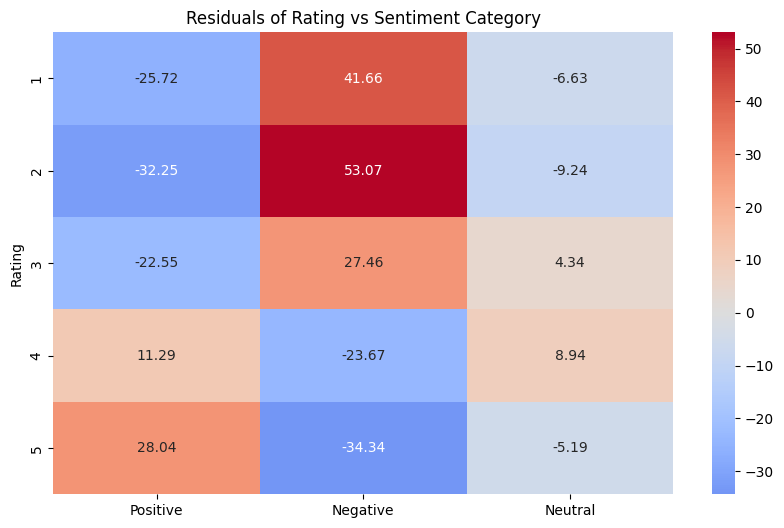

In [6]:
# Create a new figure with a specified size for the heatmap
# figsize=(10, 6) sets the width and height of the figure, ensuring the heatmap is large enough for clear visualization
plt.figure(figsize=(10, 6))

# Generate a heatmap to visualize the residuals
# sns.heatmap creates the heatmap using seaborn
# residuals_df is the DataFrame containing the residuals
# annot=True displays the numerical values of the residuals in each cell of the heatmap
# fmt=".2f" formats these values to two decimal places for clarity
# cmap='coolwarm' uses a color gradient from cool to warm to represent the magnitude of residuals
# center=0 centers the color map around zero, making it easier to see deviations from the expected frequencies
sns.heatmap(residuals_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Set the title of the heatmap
# This helps identify the heatmap as displaying the residuals between ratings and sentiment categories
plt.title('Residuals of Rating vs Sentiment Category')

# Display the heatmap
plt.show()

### **Reference**

Melanie. (2024, July 31). Pearson and spearman correlations: A guide to 	understanding and applying correlation methods. DataScientest. 	https://datascientest.com/en/pearson-and-spearman-correlations-a-guide-to-under	standing-and-applying-correlation-methods

Hayes, A. (2024, July 30). Chi-Square (Χ2) statistic: What it is, examples, how and 	when to use the test. Investopedia. 	https://www.investopedia.com/terms/c/chi-square-statistic.asp

Bock, T. (2020, December 7). What are residuals?. Displayr. 	https://www.displayr.com/learn-what-are-residuals/